**Column Details:**

| **Column Name**      | **Description**                                                                 |
|----------------------|----------------------------------------------------------------------------------|
| `Date`               | The date of the observation (avocado sale record).                              |
| `AveragePrice`       | The average price of a single avocado on that date in a specific region.        |
| `Total Volume`       | The total number of avocados sold.                                              |
| `4046`               | Volume sold of PLU 4046 (small Hass avocados).                                  |
| `4225`               | Volume sold of PLU 4225 (large Hass avocados).                                  |
| `4770`               | Volume sold of PLU 4770 (extra-large Hass avocados).                            |
| `Total Bags`         | Total number of avocado bags sold (all sizes).                                  |
| `Small Bags`         | Number of small avocado bags sold.                                              |
| `Large Bags`         | Number of large avocado bags sold.                                              |
| `XLarge Bags`        | Number of extra-large avocado bags sold.                                        |
| `type`               | Type of avocado sale — either "conventional" or "organic".                      |
| `year`               | The year when the sales were recorded.                                          |
| `region`             | The geographical area where the avocado sales occurred.                         |


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/avocado.csv")

In [3]:

df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [5]:
df.shape

(18249, 14)

In [6]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [7]:
# Removing unecessary columns
df.drop(columns=['Unnamed: 0',"Date"], axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 1.7+ MB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
year,18249.0,2016.147899,9.399385e-01,2015.00,2015.00,2016.00,2017.00,2018.00


In [10]:
df.isnull().sum()

,0
AveragePrice,0
Total Volume,0
4046,0
4225,0
4770,0
Total Bags,0
Small Bags,0
Large Bags,0
XLarge Bags,0
type,0


In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
# Separating categorical and numerical column
col = df.dtypes == 'object'
obj_cols = (col[col] == True).index
col = df.dtypes == np.number
num_cols = (col[col] == True).index

print("Categorical Columns are: ", obj_cols)
print("Numerical Columns are: ", num_cols)

Categorical Columns are:  Index(['type', 'region'], dtype='object')
Numerical Columns are:  Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags'],
      dtype='object')


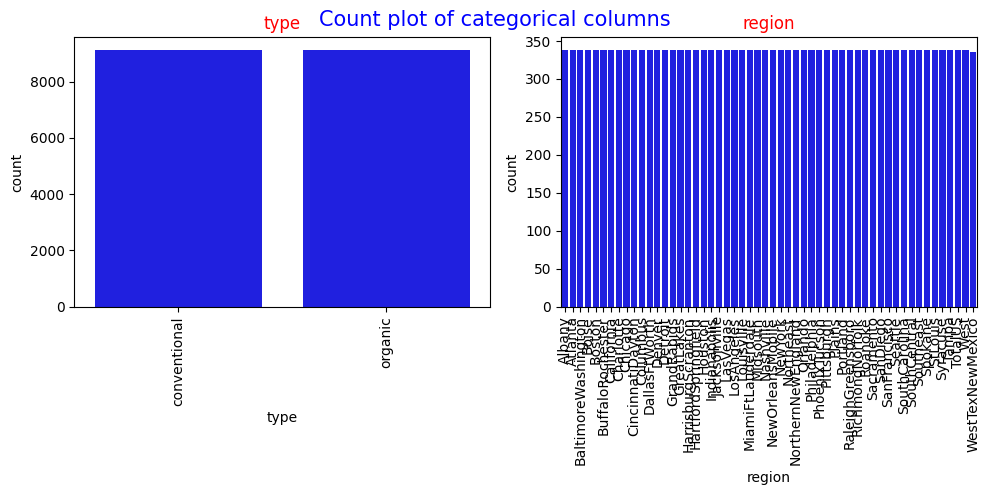

In [13]:
# Countplot of all the categorical column
plt.figure(figsize=(10, 5))
index = 0
for col in obj_cols:
    index += 1
    plt.subplot(1, 2, index)
    sns.countplot(x=df[col], color="blue")
    plt.title(col, color="red")
    plt.xticks(rotation=90)
    plt.tight_layout()
plt.suptitle("Count plot of categorical columns", size=15, color="blue")
plt.show()

From the above plots we can make out:
* Conventional and Organic are equally sold
* Every regin has been mentioned the exact number of time except the last category "WestTexNewMexico"

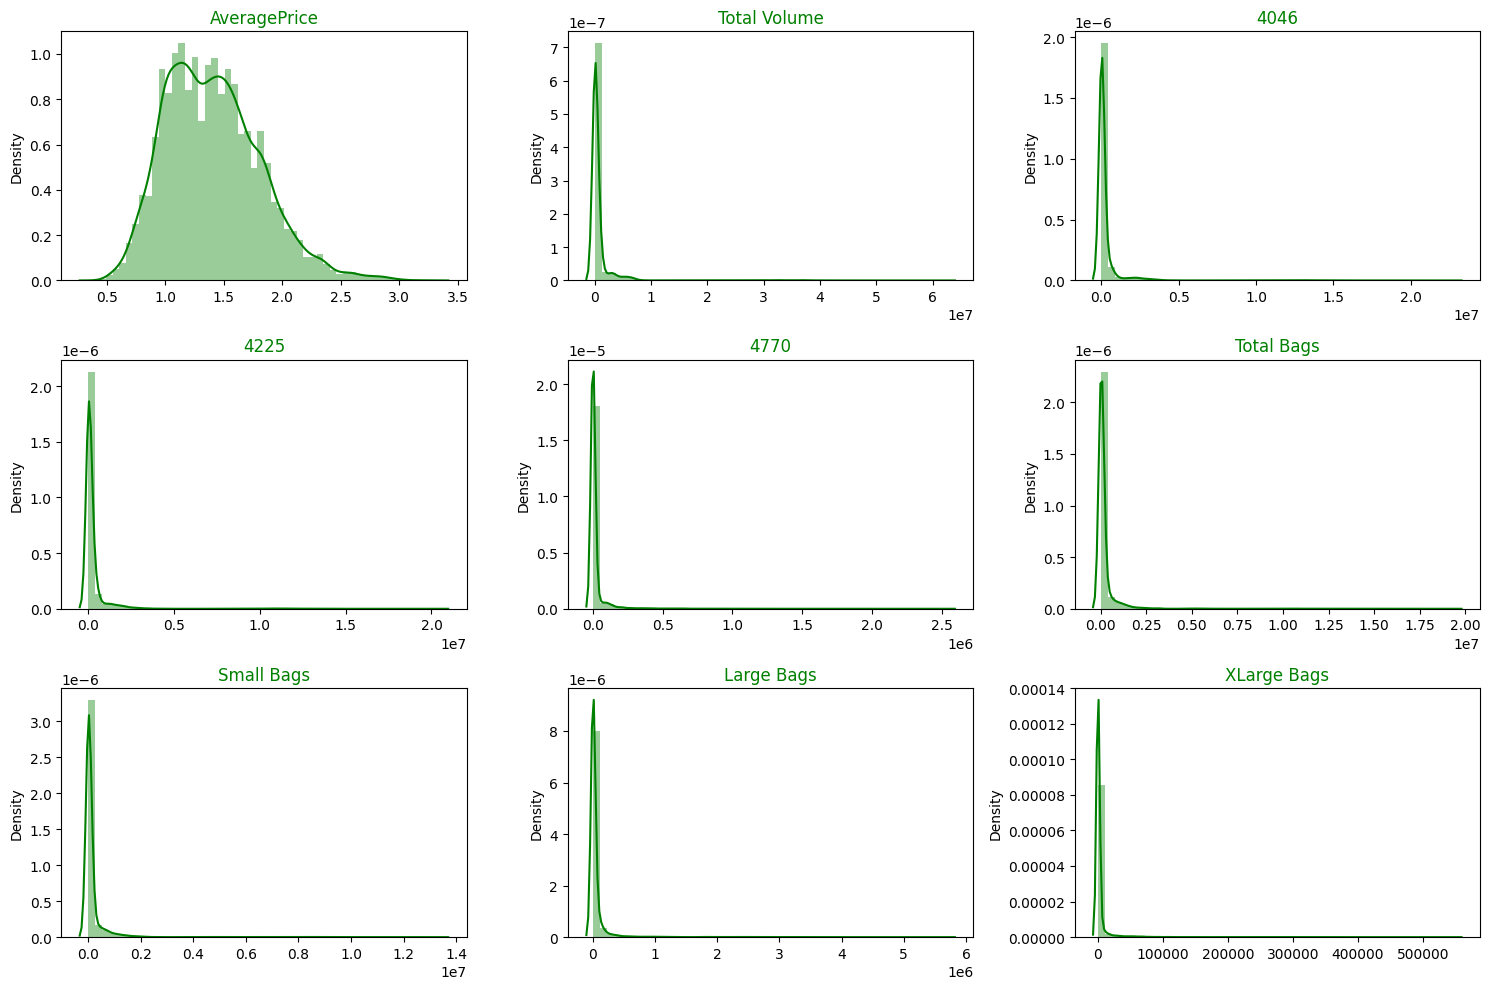

In [14]:
# Let's check density plot of all the numerical columns
plt.figure(figsize=(15, 10))
index = 0
for col in num_cols:
    index += 1
    plt.subplot(3, 3, index)
    sns.distplot(x=df[col], color="green")
    plt.title(col, color="green")
    plt.tight_layout()
plt.show()

* From the above plots we can say that our features are hevily skewed.
* "AveragePrice" i.e our target column appears to be normally distribute
* All the other columns are right skewed.

In [ ]:
# Let's check density plot of all the numerical columns
plt.figure(figsize=(15, 10))
index = 0
for col in num_cols:
    index += 1
    plt.subplot(3, 3, index)
    sns.histplot(x=df[col], color="hotpink")
    plt.title(col, color="hotpink")
    plt.tight_layout()
plt.show()

* We can see that most of the plots are quite similar only that the scale is different

In [ ]:
# Let's check density plot of all the numerical columns
plt.figure(figsize=(15, 10))
index = 0
for col in num_cols:
    index += 1
    plt.subplot(3, 3, index)
    sns.boxplot(x=df[col], color="red")
    plt.title(col, color="red")
    # plt.xticks(rotation=90)
    plt.tight_layout()
# plt.suptitle("Density plot of all numerical columns", size=15, color="blue")
plt.show()